**<h1 style="color:cyan" align="left">Sentiment Analysis with NLP – Transcripts</h1>**


There are several famous comedians. 

our target to know and to find some reasons why 'Ali Wong' is a famous good comedien.
The transcript of the file is on the following link: http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/

This can be achieved by analyzing several critierias, for example:

Questions:

1. What are the most common 15x top words repeated between comedians ?  (20%)
2. What are the number of unique words for each comedian ? (20%)
3. How many bad words (fucking, fuck , shit) have been said for each comedian ? (20%)
4. Sentiment Analysis ? objectivity, subjectivity and polarity? (40%)
5. (optional) speed of speak?

Then analyze why 'Ali Wong' is famous.

**<h3 style="color:yellow" align="left">Data set</h3>**

The dataset is scrapped and prepared in pickle format. To Read this data you need to read the files by pickle.


**<h3 style="color:yellow" align="left">Steps</h3>**

1. Read the data
2. Clean and prepare the data
3. Do some Exploratory data analysis (answering the questions above)
4. Do Sentiment Analysis
5. Get and write down some findings
6. Submit the project as as **jupyter notebook** till friday 28.01.2022 15:00

**<h3 style="color:yellow" align="left">Reading the Data</h3>**

In [11]:
# Comedian names
import pickle
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

data = {}  # key: comedian   value: list of transcripts

# Load Pickled Files
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

# Double Check of the data loaded properly
print(data.keys())


print(data['ali'][0:2] ) # only two stand-ups

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])
['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.', 'Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that hug

**<h3 style="color:yellow" align="left">Imports</h3>**

In [12]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer # Sentiment Analysis
import string
import re
import nltk

from pathlib import Path 
from pprint import pprint
import string
import pandas as pd

**<h3 style="color:yellow" align="left">Creating a Data Frame from the transcripts</h3>**

In [13]:
# Convert the text to strings and save them to variables
data_ali_str = str(data["ali"]).replace("\\n"," ")
data_anthony_str = str(data["anthony"]).replace("\\n"," ")
data_bill_str = str(data["bill"]).replace("\\n"," ")
data_bo_str = str(data["bo"]).replace("\\n"," ")
data_dave_str = str(data["dave"]).replace("\\n"," ")
data_hasan_str = str(data["hasan"]).replace("\\n"," ")
data_jim_str = str(data["jim"]).replace("\\n"," ")
data_joe_str = str(data["joe"]).replace("\\n"," ")
data_john_str = str(data["john"]).replace("\\n"," ")
data_louis_str = str(data["louis"]).replace("\\n"," ")
data_mike_str = str(data["mike"]).replace("\\n"," ")
data_ricky_str = str(data["ricky"]).replace("\\n"," ")

In [14]:
# Save the strings to seperate columns in the data frame
data["ali"] = data_ali_str
data["anthony"] = data_anthony_str
data["bill"] = data_bill_str
data["bo"] = data_bo_str
data["dave"] = data_dave_str
data["hasan"] = data_hasan_str
data["jim"] = data_jim_str
data["joe"] = data_joe_str
data["john"] = data_john_str
data["louis"] = data_louis_str
data["mike"] = data_mike_str
data["ricky"] = data_ricky_str

In [15]:
# Create the data frame with two columns for comedian and their routine ("name" and "text") 
combined_df = pd.DataFrame(data.items(), columns=['name', 'text'])

dataset = combined_df
dataset.head()

,name,text
0,louis,['Intro Fade the music out. Let’s roll. Hold t...
1,dave,['This is Dave. He tells dirty jokes for a liv...
2,ricky,['Hello. Hello! How you doing? Great. Thank yo...
3,bo,['Bo What? Old MacDonald had a farm E I E I O ...
4,bill,"['[cheers and applause] All right, thank you! ..."


**<h3 style="color:yellow" align="left">Punctuation Removal</h3>**

In [16]:
def remove_punctuation(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation])

    return txt_nopunct

dataset["text_nopunct"] = dataset["text"].apply(lambda x:remove_punctuation(x))
dataset.head()

,name,text,text_nopunct
0,louis,['Intro Fade the music out. Let’s roll. Hold t...,Intro Fade the music out Let’s roll Hold there...
1,dave,['This is Dave. He tells dirty jokes for a liv...,This is Dave He tells dirty jokes for a living...
2,ricky,['Hello. Hello! How you doing? Great. Thank yo...,Hello Hello How you doing Great Thank you Wow ...
3,bo,['Bo What? Old MacDonald had a farm E I E I O ...,Bo What Old MacDonald had a farm E I E I O And...
4,bill,"['[cheers and applause] All right, thank you! ...",cheers and applause All right thank you Thank ...


**<h3 style="color:yellow" align="left">Tokenizing (using REGEX) and lowering</h3>**


NLTK contains a module called tokenize() which further classifies into two sub-categories: Word tokenize: We use the word_tokenize() method to split a sentence into tokens or words.

In [17]:
def tokenize(txt):
    tokens = re.split("\W+", txt) # Split on all NON-Words, +: means one ore more charachters
    return tokens

dataset["text_tokens"] = dataset["text_nopunct"].apply(lambda x: tokenize(x.lower()))

dataset.head()

,name,text,text_nopunct,text_tokens
0,louis,['Intro Fade the music out. Let’s roll. Hold t...,Intro Fade the music out Let’s roll Hold there...,"[intro, fade, the, music, out, let, s, roll, h..."
1,dave,['This is Dave. He tells dirty jokes for a liv...,This is Dave He tells dirty jokes for a living...,"[this, is, dave, he, tells, dirty, jokes, for,..."
2,ricky,['Hello. Hello! How you doing? Great. Thank yo...,Hello Hello How you doing Great Thank you Wow ...,"[hello, hello, how, you, doing, great, thank, ..."
3,bo,['Bo What? Old MacDonald had a farm E I E I O ...,Bo What Old MacDonald had a farm E I E I O And...,"[bo, what, old, macdonald, had, a, farm, e, i,..."
4,bill,"['[cheers and applause] All right, thank you! ...",cheers and applause All right thank you Thank ...,"[cheers, and, applause, all, right, thank, you..."


**<h3 style="color:yellow" align="left">Stop Word Removal</h3>**


Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and



Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information

In [18]:
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(txt):
    txt_clean = [word for word in txt if word not in stopwords]
    return txt_clean

dataset["text_nostopw"] = dataset["text_tokens"].apply(lambda x: remove_stopwords(x))
dataset.head()

,name,text,text_nopunct,text_tokens,text_nostopw
0,louis,['Intro Fade the music out. Let’s roll. Hold t...,Intro Fade the music out Let’s roll Hold there...,"[intro, fade, the, music, out, let, s, roll, h...","[intro, fade, music, let, roll, hold, lights, ..."
1,dave,['This is Dave. He tells dirty jokes for a liv...,This is Dave He tells dirty jokes for a living...,"[this, is, dave, he, tells, dirty, jokes, for,...","[dave, tells, dirty, jokes, living, stare, har..."
2,ricky,['Hello. Hello! How you doing? Great. Thank yo...,Hello Hello How you doing Great Thank you Wow ...,"[hello, hello, how, you, doing, great, thank, ...","[hello, hello, great, thank, wow, calm, shut, ..."
3,bo,['Bo What? Old MacDonald had a farm E I E I O ...,Bo What Old MacDonald had a farm E I E I O And...,"[bo, what, old, macdonald, had, a, farm, e, i,...","[bo, old, macdonald, farm, e, e, farm, pig, e,..."
4,bill,"['[cheers and applause] All right, thank you! ...",cheers and applause All right thank you Thank ...,"[cheers, and, applause, all, right, thank, you...","[cheers, applause, right, thank, thank, much, ..."


**<h3 style="color:yellow" align="left">Lemmatizer</h3>**


It helps in returning the base or dictionary form of a word, which is known as the lemma.

In [19]:
wn = nltk.WordNetLemmatizer()

def lemmatize(txt):
    txt_lemmas = [wn.lemmatize(word) for word in txt]
    return txt_lemmas

dataset["lemmatized"] = dataset["text_nostopw"].apply(lambda x: lemmatize(x))
dataset.head(12)

,name,text,text_nopunct,text_tokens,text_nostopw,lemmatized
0,louis,['Intro Fade the music out. Let’s roll. Hold t...,Intro Fade the music out Let’s roll Hold there...,"[intro, fade, the, music, out, let, s, roll, h...","[intro, fade, music, let, roll, hold, lights, ...","[intro, fade, music, let, roll, hold, light, l..."
1,dave,['This is Dave. He tells dirty jokes for a liv...,This is Dave He tells dirty jokes for a living...,"[this, is, dave, he, tells, dirty, jokes, for,...","[dave, tells, dirty, jokes, living, stare, har...","[dave, tell, dirty, joke, living, stare, hard,..."
2,ricky,['Hello. Hello! How you doing? Great. Thank yo...,Hello Hello How you doing Great Thank you Wow ...,"[hello, hello, how, you, doing, great, thank, ...","[hello, hello, great, thank, wow, calm, shut, ...","[hello, hello, great, thank, wow, calm, shut, ..."
3,bo,['Bo What? Old MacDonald had a farm E I E I O ...,Bo What Old MacDonald had a farm E I E I O And...,"[bo, what, old, macdonald, had, a, farm, e, i,...","[bo, old, macdonald, farm, e, e, farm, pig, e,...","[bo, old, macdonald, farm, e, e, farm, pig, e,..."
4,bill,"['[cheers and applause] All right, thank you! ...",cheers and applause All right thank you Thank ...,"[cheers, and, applause, all, right, thank, you...","[cheers, applause, right, thank, thank, much, ...","[cheer, applause, right, thank, thank, much, t..."
5,jim,['[Car horn honks] [Audience cheering] [Announ...,Car horn honks Audience cheering Announcer Lad...,"[car, horn, honks, audience, cheering, announc...","[car, horn, honks, audience, cheering, announc...","[car, horn, honk, audience, cheering, announce..."
6,john,"['All right, Petunia. Wish me luck out there. ...",All right Petunia Wish me luck out there You w...,"[all, right, petunia, wish, me, luck, out, the...","[right, petunia, wish, luck, die, august, 7th,...","[right, petunia, wish, luck, die, august, 7th,..."
7,hasan,['[theme music: orchestral hip-hop] [crowd roa...,theme music orchestral hiphop crowd roars What...,"[theme, music, orchestral, hiphop, crowd, roar...","[theme, music, orchestral, hiphop, crowd, roar...","[theme, music, orchestral, hiphop, crowd, roar..."
8,ali,"['Ladies and gentlemen, please welcome to the ...",Ladies and gentlemen please welcome to the sta...,"[ladies, and, gentlemen, please, welcome, to, ...","[ladies, gentlemen, please, welcome, stage, al...","[lady, gentleman, please, welcome, stage, ali,..."
9,anthony,"['Thank you. Thank you. Thank you, San Francis...",Thank you Thank you Thank you San Francisco Th...,"[thank, you, thank, you, thank, you, san, fran...","[thank, thank, thank, san, francisco, thank, m...","[thank, thank, thank, san, francisco, thank, m..."


**<h3 style="color:yellow" align="left">Converting data to strings and saving them separately for each comedian</h3>**

In [20]:

louis_text = str(dataset["lemmatized"][0])
dave_text = str(dataset["lemmatized"][1])
ricky_text = str(dataset["lemmatized"][2])
bo_text = str(dataset["lemmatized"][3])
bill_text = str(dataset["lemmatized"][4])
jim_text = str(dataset["lemmatized"][5])
john_text = str(dataset["lemmatized"][6])
hasan_text = str(dataset["lemmatized"][7])
ali_text = str(dataset["lemmatized"][8])
anthony_text = str(dataset["lemmatized"][9])
mike_text = str(dataset["lemmatized"][10])
joe_text = str(dataset["lemmatized"][11])


In [21]:
full_text = louis_text + " " + dave_text + " " +  ricky_text + " " +  bo_text + " " +  bill_text + " " +  jim_text + " " +  john_text + " " +  hasan_text + " " +  ali_text + " " +  anthony_text + " " +  mike_text + " " +  joe_text

**<h3 style="color:yellow" align="left">Punctuation removal for the full text</h3>**



In [22]:
def remove_punctuation(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation])

    return txt_nopunct

full_text_nopunc = remove_punctuation(full_text)

**<h3 style="color:yellow" align="left">TF-IDF applied to the full text</h3>**


TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents.


We generally compute a score for each word to signify its importance in the document and corpus.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer()


corpus = [full_text_nopunc]


x = tfid_vect.fit(corpus)

tfid_vect.get_feature_names()

x.vocabulary_

# Create DTM
x = tfid_vect.transform(corpus)

# Create PD DataFrame

df = pd.DataFrame(x.toarray(), columns = tfid_vect.get_feature_names())
#df.head().T


C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**<h1 style="color:cyan" align="left">1. What are the most common 15x top words repeated between comedians ?</h1>**

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling.



Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.


In [24]:
df_T = df.T
df_T = df_T.nlargest(15, 0)
df_T = df_T.rename(columns={0: 'common_words_between_comedians'})
df_T

,common_words_between_comedians
like,0.563078
know,0.288847
go,0.204629
right,0.194189
get,0.182357
one,0.158344
people,0.147904
said,0.129807
got,0.122847
say,0.122499


After applying the Lemmatization Technique above we found out that even though it a superior technique in comparision to Stemming, 


it doesnt change some words to the main root as it should (e.g. "Fucking").


Therefore for precisely answering the question number 1 we aditionally apply the Stemming Technique. 

**<h3 style="color:yellow" align="left">Punctuation removal for Ali's transcript</h3>**


In [25]:
def remove_punctuation(txt):
    txt_nopunct_ali = "".join([char for char in txt if char not in string.punctuation])

    return txt_nopunct_ali

ali_text_nopunc = remove_punctuation(ali_text)

**<h3 style="color:yellow" align="left">TF-IDF applied for Ali's transcript</h3>**


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer()


corpus_ali = [ali_text_nopunc]


x = tfid_vect.fit(corpus_ali)

tfid_vect.get_feature_names()

x.vocabulary_

# Create DTM
x = tfid_vect.transform(corpus_ali)

# Create PD DataFrame

df_ali = pd.DataFrame(x.toarray(), columns = tfid_vect.get_feature_names())

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**<h3 style="color:yellow" align="left">Ali's top 15 most repeated words in her transcript</h3>**

In [27]:
df_T_ali = df_ali.T
df_T_ali = df_T_ali.nlargest(15, 0)
df_T_ali = df_T_ali.rename(columns={0: 'common_words_between_comedians'})
df_T_ali

,common_words_between_comedians
like,0.603916
know,0.330716
get,0.201305
shit,0.167754
gonna,0.134203
woman,0.129410
ok,0.124617
lot,0.119825
go,0.110239
day,0.100653


**<h1 style="color:cyan" align="left">2. What are the number of unique words for each comedian ?</h1>**



Vectorization --> Converting words to numbers

- Count Vectorization
- Train the dictionary
- Get a list of words (dictionary)
- Get a DTM --> Document-Term Matrix


In [28]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

comedian_text_list = [louis_text, dave_text, ricky_text, bo_text, bill_text, jim_text, john_text, hasan_text, ali_text, anthony_text, mike_text, joe_text]

name_text=["louis", "dave", "ricky", "bo", "bill", "jim", "john", "hasan", "ali", "anthony", "mike", "joe"]


comedian_unique_list = []
comedian_unique_list_1 = []
comedian_unique_list_2 = []
i = 0

for txt in comedian_text_list:

    corp = [txt]

    # Learn the dictionary of corpus
    x = cv.fit(corp)

    # Get a list of words (dictionary)
    cv.get_feature_names()

    # Get list of words with index (key:word, value: index)
    x.vocabulary_

    # Create a Document-Term Matrix (DTM)
    x = cv.transform(corp)

    x.toarray()
    

    result_labels = str(name_text[i]) + ": " + str(x.shape[1])
    comedian_unique_list.append(result_labels)
    comedian_unique_list_1.append((x.shape[1]/1636)*100)
    comedian_unique_list_2.append(x.shape[1])
    i +=1
    # Create Pd DataFrame
    df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
#df.head()


C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The answer of this question may vary due to applying different processing techniques e.g. (Lemmatization, Stemming etc.).


After carefull consideration we picked Lemmatization technique, as we considered it better for our purpose.

In [29]:
comedian_unique_list

['louis: 1065',
 'dave: 1364',
 'ricky: 1612',
 'bo: 1292',
 'bill: 1636',
 'jim: 1290',
 'john: 1374',
 'hasan: 1552',
 'ali: 1317',
 'anthony: 972',
 'mike: 1458',
 'joe: 1397']

**<h1 style="color:cyan" align="left">Visualizations</h1>**

**<h3 style="color:yellow" align="left">Plotting the Number of Unique Words for each Comedian</h3>**

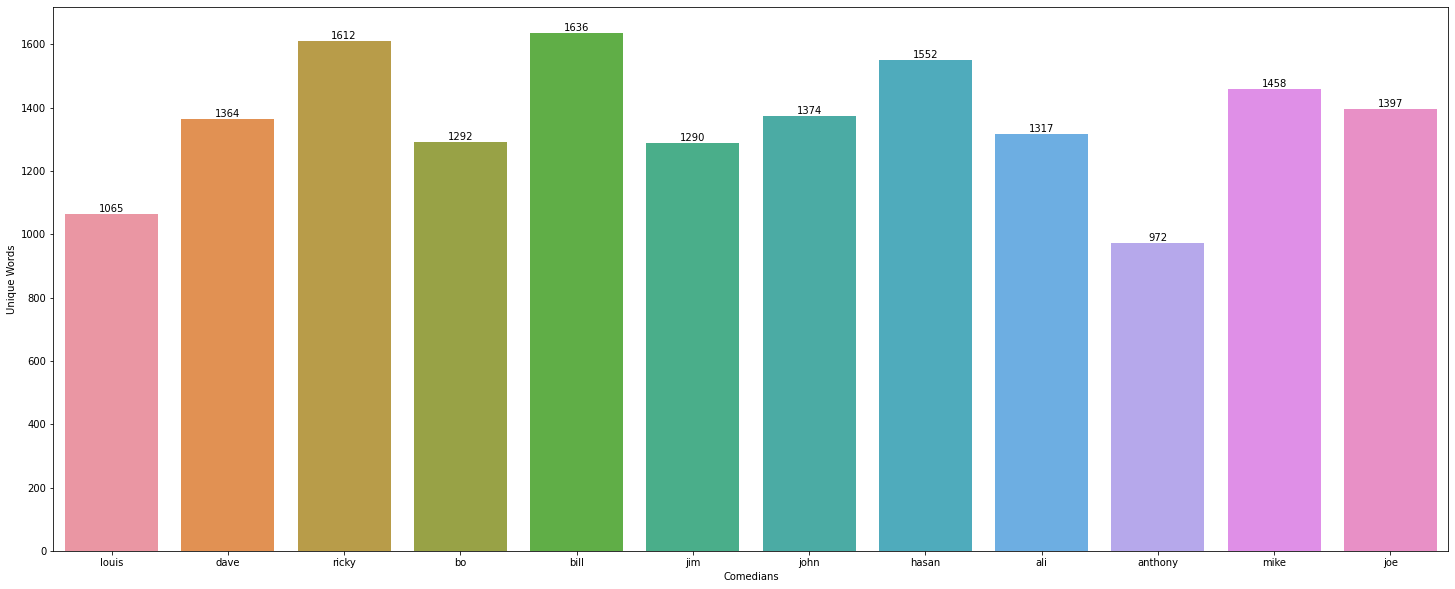

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(25,10))
plt.xlabel("Comedians")
plt.ylabel("Unique Words")
ax = sns.barplot(x= name_text, y= comedian_unique_list_2)

for i in ax.containers:
    ax.bar_label(i, )


**<h1 style="color:cyan" align="left">3. How many bad words (fucking, fuck , shit) have been said for each comedian?</h1>**

In [31]:
bad_word_data = pd.read_csv("bad_data.csv")
#print(bad_word_data)

bad_words = bad_word_data['is_offensive'].tolist()

#print(type(bad_words))

name_text=["louis", "dave", "ricky", "bo", "bill", "jim", "john", "hasan", "ali", "anthony", "mike", "joe"] 
f1_word_list = []


for i in range(12):
    count = 0
    for j in dataset["lemmatized"][i]:
        if j in bad_words:
            count += 1
            
    f1_word_list.append(count)
        #print(i)
    print(f"Number of bad words in text {name_text[i]} are: ", count)

Number of bad words in text louis are:  152
Number of bad words in text dave are:  256
Number of bad words in text ricky are:  166
Number of bad words in text bo are:  141
Number of bad words in text bill are:  281
Number of bad words in text jim are:  260
Number of bad words in text john are:  78
Number of bad words in text hasan are:  74
Number of bad words in text ali are:  106
Number of bad words in text anthony are:  60
Number of bad words in text mike are:  34
Number of bad words in text joe are:  292


**<h3 style="color:yellow" align="left">Plotting the number of Bad Words each Comedian uses</h3>**


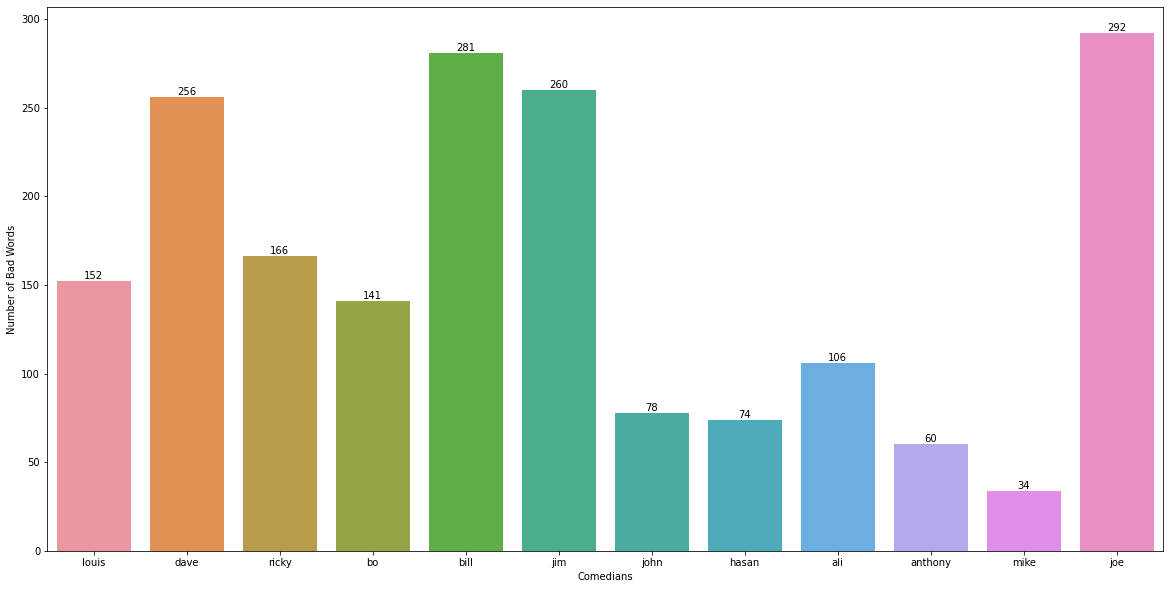

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Number of Bad Words")
bx = sns.barplot(x= name_text, y= f1_word_list)

for i in bx.containers:
    bx.bar_label(i, )

**<h3 style="color:yellow" align="left">Ratio of Bad Words to total number of words for each comedian</h3>**

In [33]:
word_sum_list =[]
for com_idex in range(12):
    dummy_text = str(dataset['text_nostopw'][com_idex])
    #dummy_text = dataset['text'][com_idex]
    blob = TextBlob(dummy_text)
    blob_word_counts = blob.word_counts.values()
    word_sum = 0
    for i in blob_word_counts:    
        word_sum = word_sum +i
    #print(word_sum)

    word_sum_list.append(word_sum)

In [34]:
f_word_ratio_list =[]
for i in range(12):
  #speed_min = comedian_unique_list_2[i]/run_time[i]
  f_ratio = f1_word_list[i]/word_sum_list[i]
  f_word_ratio_list.append(f_ratio)

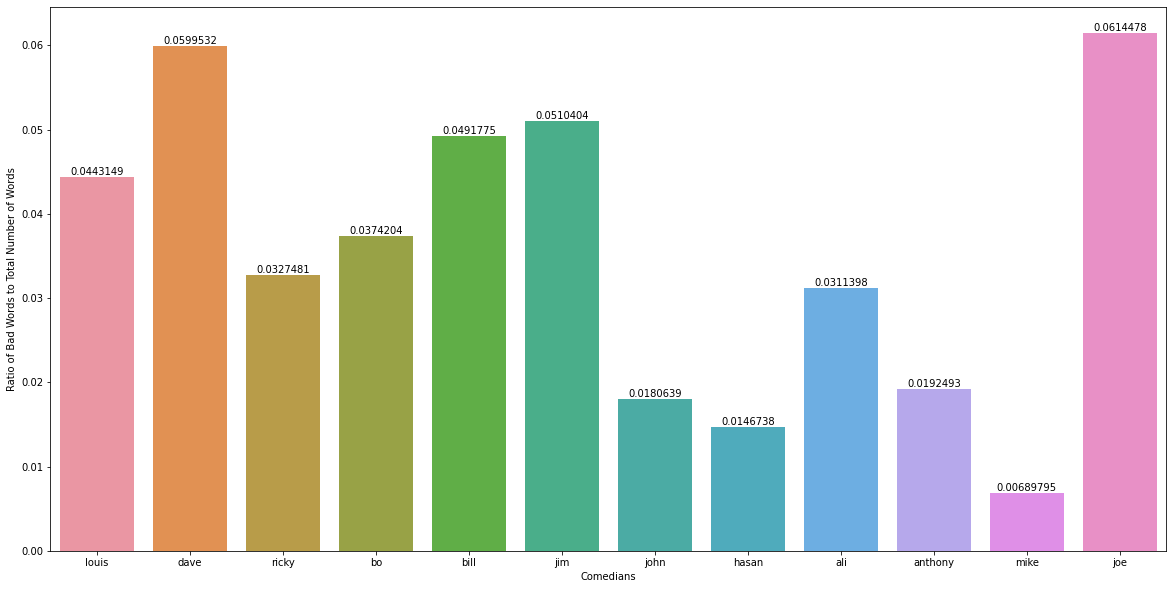

In [35]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Ratio of Bad Words to Total Number of Words")
fx = sns.barplot(x= name_text, y= f_word_ratio_list)

for i in fx.containers:
    fx.bar_label(i, )

**<h1 style="color:cyan" align="left">4. Sentiment Analysis? Objectivity, subjectivity and polarity?</h1>**

The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it.


Typically, we quantify this sentiment with a positive or negative value, called polarity. 


The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.


Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.


**<h3 style="color:yellow" align="left">Sentiment Analysis</h3>**

In [36]:
name_text=[louis_text, dave_text ,ricky_text ,bo_text ,bill_text ,jim_text ,john_text ,hasan_text ,ali_text , anthony_text, mike_text, joe_text] 

pol_list =[]
sub_list =[]
for txt in name_text:
    blob1 = TextBlob(txt)
    pol, sub =blob1.sentiment
    pol_list.append(pol)
    sub_list.append(sub)

In [37]:
import matplotlib.pyplot as plt
comedians_list= ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'] 

What is objective and subjective in sentiment analysis?



Facts are objective expressions about entities, events and their properties.



Opinions are usually subjective expressions that describe people's sentiments, appraisals or feelings toward entities, events and their properties.


**<h3 style="color:yellow" align="left">Plotting the Polarity in Sentiment Analysis</h3>**

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.


In the plot below the polarity of Joe's text is close to zero, therefore the bar is not visible.

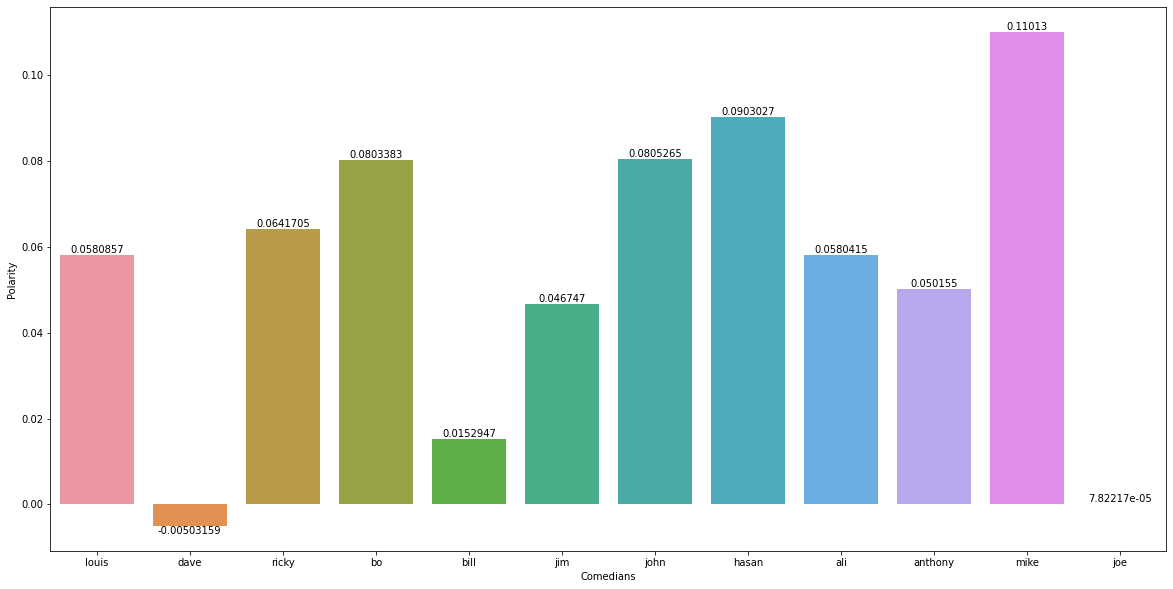

In [38]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Polarity")
cx = sns.barplot(x= comedians_list, y= pol_list)

for i in cx.containers:
    cx.bar_label(i, )

**<h3 style="color:yellow" align="left">Plotting the Objectivity in Sentiment Analysis</h3>**


Objectivity lies between [0.0,1.0].


0.0 is very objective and 1.0 is very subjective.


If objectivity > 0.5, the sentence is more objective than subjective and vice versa.

In [39]:
object_list = []
for i in sub_list:
    obj = 1-i
    object_list.append(obj)

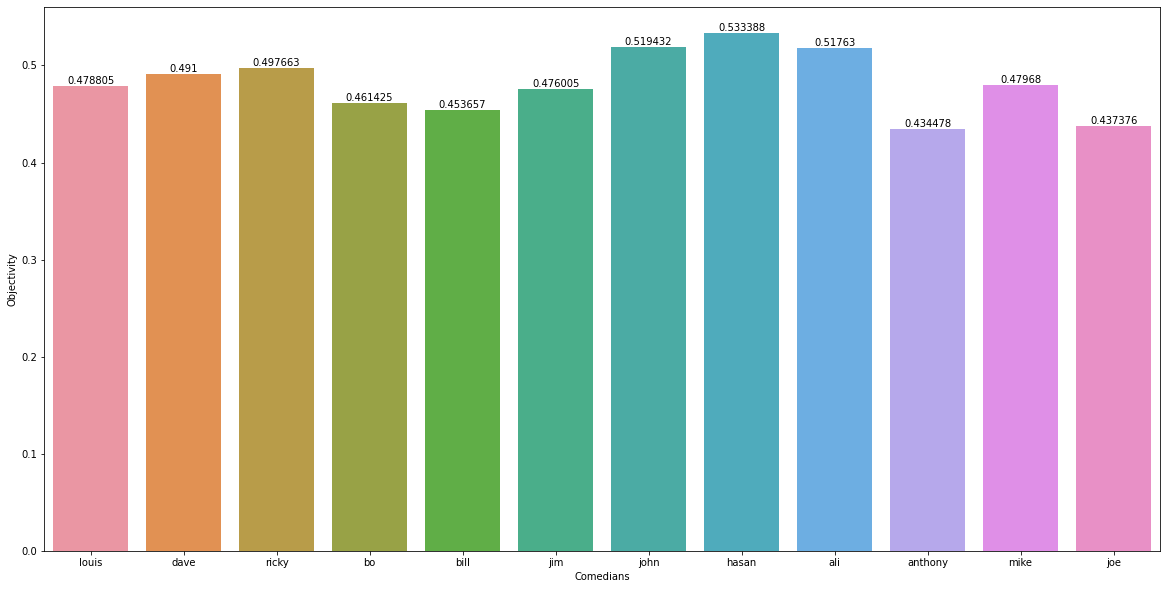

In [40]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Objectivity")
dx = sns.barplot(x= comedians_list, y= object_list)

for i in dx.containers:
    dx.bar_label(i, )


**<h3 style="color:yellow" align="left">Plotting the Subjectivity in Sentiment Analysis</h3>**


Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]


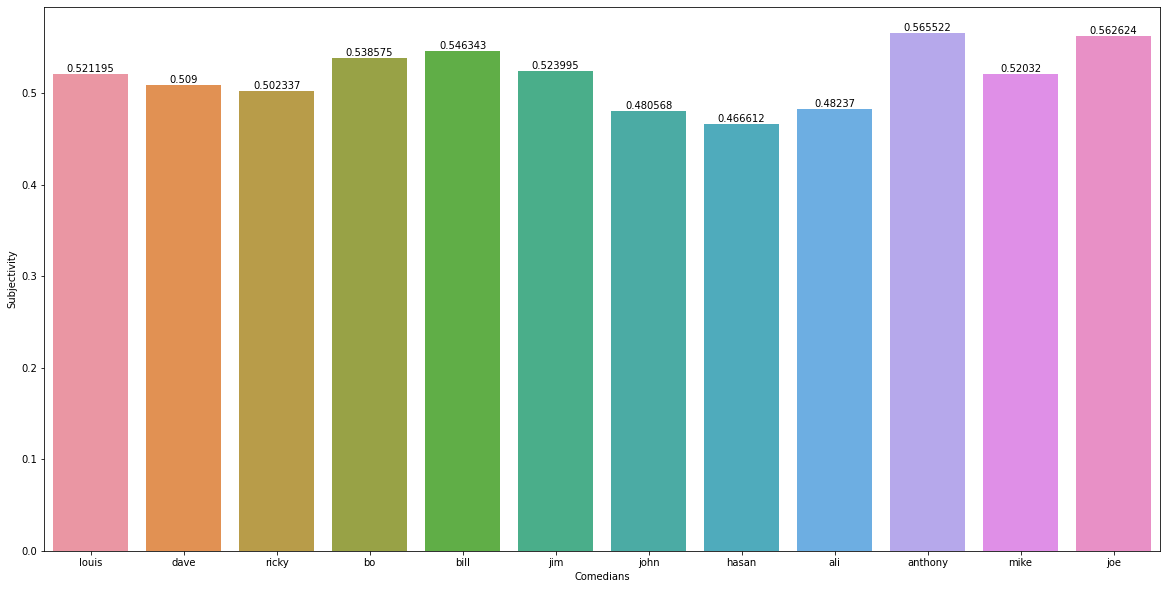

In [41]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Subjectivity")
dx = sns.barplot(x= comedians_list, y= sub_list)

for i in dx.containers:
    dx.bar_label(i, )

**<h3 style="color:yellow" align="left">Sentiment Analysis using Naive Bayes Analyzer</h3>**

This algorithm is more accurate but it is more time consuming, however it provides the results in the form of Positivity and Negativity.

In [42]:
classifi_list =[]
pos_list =[]
neg_list =[]

for txt in name_text:
    #blob1 = TextBlob(txt)
    blob = TextBlob(txt, analyzer=NaiveBayesAnalyzer())

    classification, p_pos, p_neg =blob.sentiment
    classifi_list.append(classification)
    pos_list.append(p_pos)
    neg_list.append(p_neg)

**<h3 style="color:yellow" align="left">Positive Sentiments</h3>**

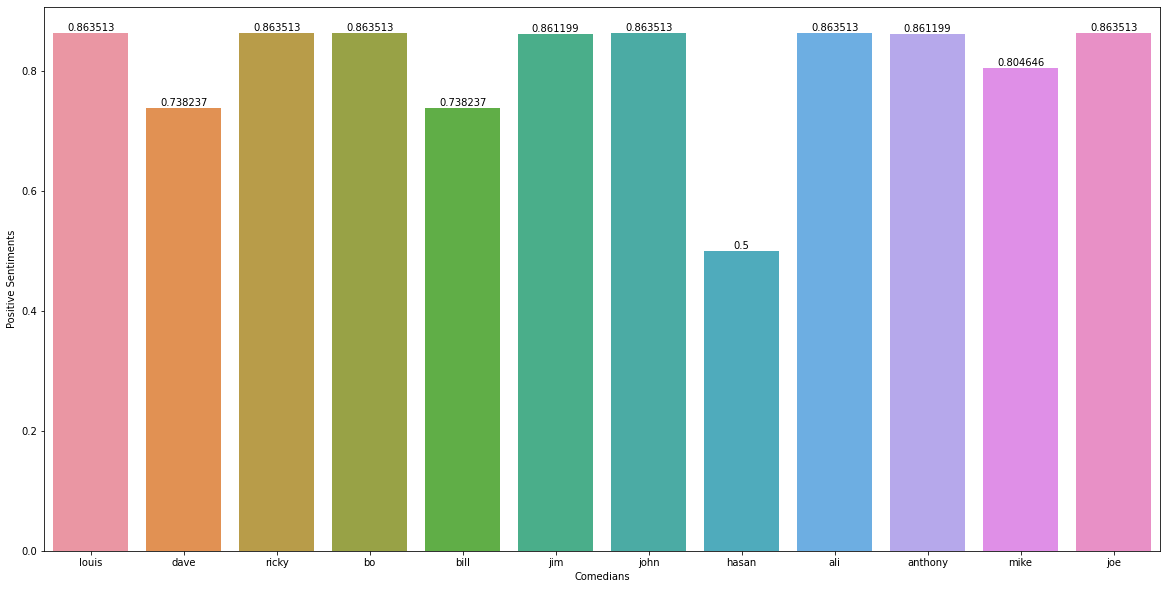

In [43]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Positive Sentiments")
ex = sns.barplot(x= comedians_list, y= pos_list)

for i in ex.containers:
    ex.bar_label(i, )

**<h3 style="color:yellow" align="left">Negative Sentiments</h3>**

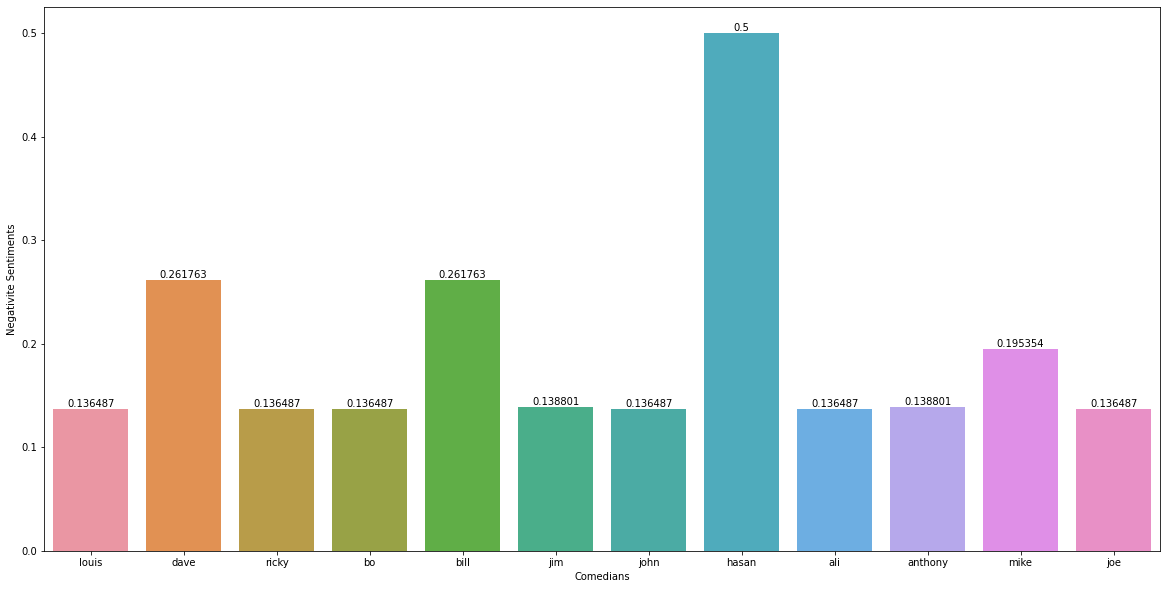

In [44]:
plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Negativite Sentiments")
fx = sns.barplot(x= comedians_list, y= neg_list)

for i in fx.containers:
    fx.bar_label(i, )

**<h1 style="color:cyan" align="left">5. What is the Speed of Speak of each Comedian?</h1>**

In [45]:
# Run time for the performance of each comedian
run_time= [58, 67, 79, 60, 80, 77, 62, 73, 60, 59, 76, 63] 
word_speed_min_list =[]
for i in range(12):
  speed_min = word_sum_list[i]/run_time[i]
  word_speed_min_list.append(speed_min)

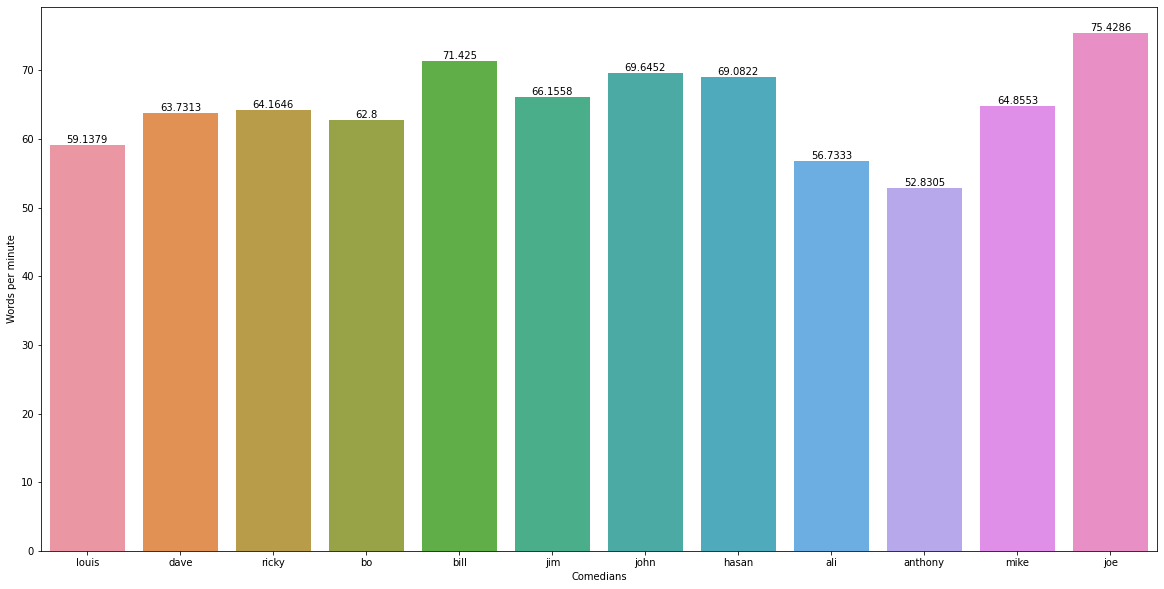

In [46]:
name_text=["louis", "dave", "ricky", "bo", "bill", "jim", "john", "hasan", "ali", "anthony", "mike", "joe"]

plt.figure(figsize=(20,10))
plt.xlabel("Comedians")
plt.ylabel("Words per minute")
fx = sns.barplot(x= name_text, y= word_speed_min_list)

for i in fx.containers:
    fx.bar_label(i, )

**<h1 style="color:cyan" align="left">6. Why is Ali Wong famous?</h1>**

Among the top 15 most common words used by the chosen comedians is a swearing word (e.g. "fucking"). 
It shows that in general comedians are swearing a lot throughout their performances. Ali is not any different, because her 4th most repeated word is “shit” and it is proving she is also, using swear words just as much. Ali’s lexicon is average in comparison to the rest of the comedians. She uses well-known words, and that way she is aiming to reach **a larger audience**. Ali does not use that many bad words in comparison to the rest of the comedians. In fact, she is in fifth position in talking with less bad words. This could be one of the reasons, why she is well accepted among various audiences.


Wong’s polarity clearly revealed that she is not reaching the end of the spectrum of positivity and negativity, and she remains **rather neutral**. That way she is aiming in the middle between pessimist and optimist and targeting a **various audience**.  Her comedy is **well-balanced** between objectivity and subjectivity. She is neither too factual nor too opinionated.
Ali expresses herself rather positively, in fact, that’s normal among the comedians. **Being positive** is beneficial for her since the audience is there to laugh and enjoy their time.

 
Wong’s **speed of speaking** is rather slow in comparison to the rest of the comedians. That provides the audience **more time to enjoy** her jokes. In addition, if there is a bit of distraction in the audience, there is still time for them to get her point. 

After scanning her transcript, it was striking how **provocative, scandalous, and vulgar** she is. All that is a well-known publicity stunt to gain the attention of the masses.

 
In addition, she is the **only woman** among the chosen comedians, and that's why she stands out.

When we sum up all the conclusions, it becomes obvious why **Ali Wang is famous**. 









